In [1]:
##MNIST

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255

model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation="relu"),                       
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10)
])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(True)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2550 - accuracy: 0.9243
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1111 - accuracy: 0.9661
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0798 - accuracy: 0.9761


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.0823 - acc: 0.9754
0.08226185857527889 0.9754


7


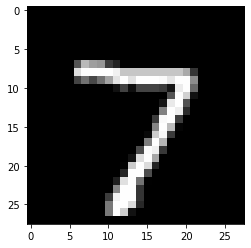

In [ ]:
prediction = model.predict(x_test)
print(np.argmax(prediction[0]))

plt.imshow(x_test[0], cmap="gray")
plt.show()


5


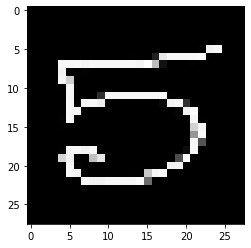

In [ ]:
import cv2

IMG_SIZE = 28

img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.bitwise_not(img)
img_new = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
img_test = img_new/255

prediction = model.predict([[img_test]])
print(np.argmax(prediction))

plt.imshow(img_test, cmap="gray")
plt.show()

In [ ]:
## EXPORT MODEL

keras_file = 'mnist_model.h5'
tf.keras.models.save_model(model, keras_file)

In [ ]:
# tflite

convert_file = 'mnist_model.tflite'
converter = tf.lite.TFLiteConverter.from_keras_model_file(keras_file)
tflite_model = converter.convert()
open(convert_file, 'wb').write(tflite_model)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 6 variables.
INFO:tensorflow:Converted 6 variables to const ops.


474424